In [2]:
#FilterTranc.ipynb created  by BWM and EGM
#program to calculate filter transmissions
import matplotlib
import mplcursors 
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from ipywidgets import *
cwd = os.getcwd()

##############################################
#Get elemental data in and properly formed
##############################################
carbon = np.loadtxt((cwd + "/sourceData/carbon.txt"), dtype = float,comments ="#",)
pt = np.loadtxt((cwd + "/sourceData/pt.txt"), dtype = float,comments ="#",)
al = np.loadtxt((cwd + "/sourceData/al.txt"), dtype = float,comments ="#",)
mylar = np.loadtxt((cwd + "/sourceData/mylar.txt"), dtype = float,comments ="#",)
Pb = np.loadtxt((cwd + "/sourceData/Pb.txt"), dtype = float,comments ="#",)
Hydrogen = np.loadtxt((cwd + "/sourceData/Hydrogen.txt"), dtype = float,comments ="#",)
Nitrogen = np.loadtxt((cwd + "/sourceData/Nitrogen.txt"), dtype = float,comments ="#",)
Oxygen = np.loadtxt((cwd + "/sourceData/Oxygen.txt"), dtype = float,comments ="#",)
###############################################
# Constants
###############################################
densC = 3.15 #g/cm^3
densPt = 21.4 #g/cm^3
densAl = 2.7 #g/cm^3
densPb = 11.34 #g/cm^3
densMylar = 1.38 #g/cm^3
densKap= 1.43 #g/cm^3
enConv = 1.60218e-19 #eV per Joule
coulPerElec =  6.28e18  #elec per s for amp
micro_cm = 1e-4 # microns to cm conversion
nano_cm = 1e-7 # nm to cm conversion
ToMev= 1e-6
freeCarrier = 13.2 #energy to make electorn whole pairs in diamond
################################################

##### Aluminum tranmission using mass attenuation

In [3]:
##enter thickess in microns
def MA_Al_Trans (metal_thick, energy):
    coefAl = np.interp((energy*ToMev), al[:,0], al[:,2])
    transAl = (math.exp(-coefAl*metal_thick*micro_cm*densAl))
    return transAl

##### Carbon tranmission using mass attenuation

In [4]:
##### enter thickness in microns
def MA_C_Trans (d_thick, energy):
    coefC = np.interp((energy*ToMev), carbon[:,0], carbon[:,2])
    transC = (math.exp(-coefC*d_thick*micro_cm*densC))
    return transC

##### Mylar tranmission using mass attenuation

In [5]:
##### enter thickness in microns
def MA_Mylar_Trans (d_thick, energy):
    coefC = np.interp((energy*ToMev), mylar[:,0], mylar[:,2])
    transC = (math.exp(-coefC*d_thick*micro_cm*densMylar))
    return transC

##### Lead tranmission using mass attenuation

In [6]:
def MA_Pb_Trans (d_thick, energy):
    coefC = np.interp((energy*ToMev), Pb[:,0], Pb[:,2])
    transC = (math.exp(-coefC*d_thick*micro_cm*densPb))
    return transC

##### Kapton tranmission using mass attenuation

In [7]:
def MA_Kapton_Trans (d_thick, energy):
    coefC = np.interp((energy*ToMev), carbon[:,0], carbon[:,2])
    transC = (math.exp(-coefC*d_thick*micro_cm*densKap))
    coefN = np.interp((energy*ToMev), Nitrogen[:,0], Nitrogen[:,2])
    transN = (math.exp(-coefN*d_thick*micro_cm*densKap))
    coefH = np.interp((energy*ToMev), Hydrogen[:,0], Hydrogen[:,2])
    transH = (math.exp(-coefH*d_thick*micro_cm*densKap))
    coefO = np.interp((energy*ToMev), Oxygen[:,0], Oxygen[:,2])
    transO = (math.exp(-coefO*d_thick*micro_cm*densKap))
    coefKap = (coefC*22 + coefN*2 + coefH*10 + coefO*5)/(22+2+10+5)
    transKap = (math.exp(-coefKap*d_thick*micro_cm*densKap))
    return transKap

In [8]:
#######magic thing to make plots interactive and prettier
%matplotlib widget

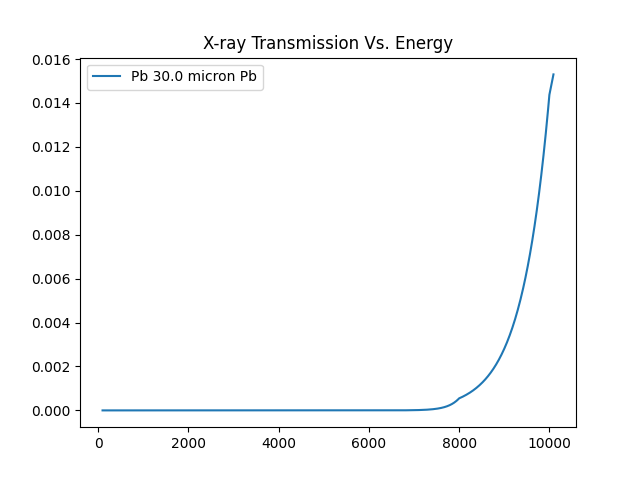

In [9]:

Pb_thick = (30)
points = 1000
PbTC = np.zeros((points),dtype=np.double)
WavL = np.zeros((points),dtype=np.double)

for val in range(points):
    energy = (val + 10) * 10
    PbTC[val] += MA_Pb_Trans(Pb_thick,energy)
    WavL[val] += energy
    
fig,ax =plt.subplots()
ax.plot(WavL[:],PbTC[:], label = "Pb {:2.1f} micron Pb".format(Pb_thick))

plt.title("X-ray Transmission Vs. Energy")
plt.legend()
plt.show()
mplcursors.cursor()

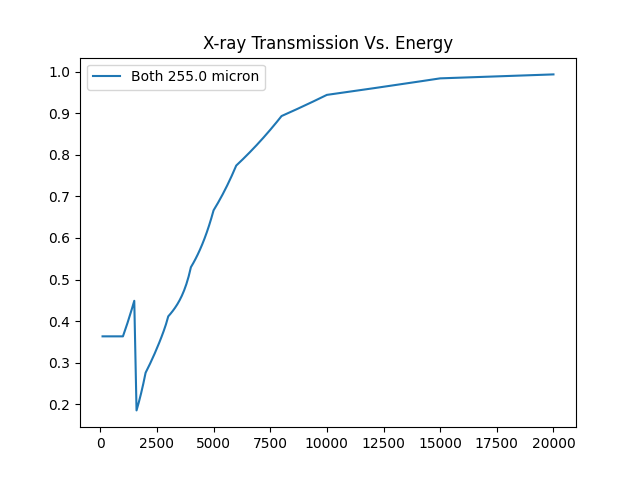

In [10]:
Al_thick = (1)
Myl_thick = (10*25.4)
points = 200
AlTC = np.zeros((points),dtype=np.double)
mylarTC = np.zeros((points),dtype=np.double)
PbTC = np.zeros((points),dtype=np.double)
WavL = np.zeros((points),dtype=np.double)

for val in range(points):
    energy = (val + 1) * 100
    AlTC[val] += MA_Al_Trans(Al_thick,energy)
    mylarTC[val] += MA_Mylar_Trans(Myl_thick,energy)
    WavL[val] += energy
fig,ax =plt.subplots()
TCMylAl = (mylarTC + AlTC)/2

# data = ax.plot(WL[:],AlTC[:], label = "Al {:2.1f} micron AL".format(Al_thick))
# data2 = ax.plot(WL[:],mylarTC[:], label = "Mylar {:2.1f} micron Mylar".format(Myl_thick))
data = ax.plot(WavL[:],TCMylAl[:], label = "Both {:2.1f} micron".format(Myl_thick+Al_thick))
plt.title("X-ray Transmission Vs. Energy")
plt.legend()
plt.show()
mplcursors.cursor()

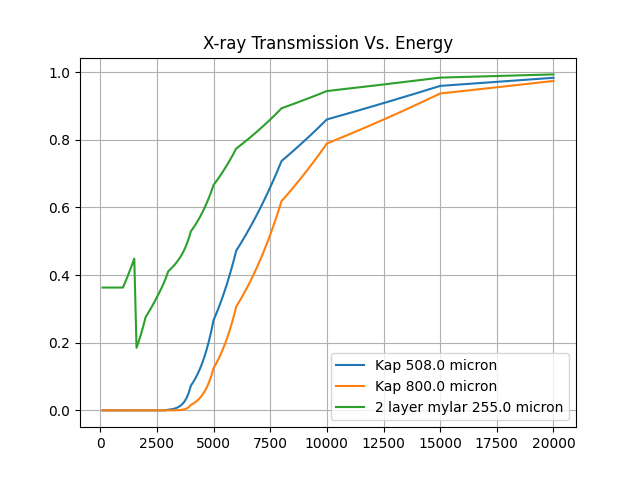

In [11]:
Kap_thick = (20*25.4)
Kap_thick2 = (800)
points = 200
KapTC = np.zeros((points),dtype=np.double)
KapTC2 = np.zeros((points),dtype=np.double)
WavL = np.zeros((points),dtype=np.double)

for val in range(points):
    energy = (val + 1) * 100
    KapTC[val] += MA_Kapton_Trans(Kap_thick,energy)
    KapTC2[val] += MA_Kapton_Trans(Kap_thick2,energy)
    WavL[val] += energy

#print(KapTC)
fig,ax =plt.subplots()
ax.plot(WavL[:],KapTC[:], label = "Kap {:2.1f} micron".format(Kap_thick))
ax.plot(WavL[:],KapTC2[:], label = "Kap {:2.1f} micron".format(Kap_thick2))
ax.plot(WavL[:],TCMylAl[:], label = "2 layer mylar {:2.1f} micron".format(Myl_thick+Al_thick))
plt.grid(visible=True, which='major', axis='both',)
plt.title("X-ray Transmission Vs. Energy")
plt.legend()
plt.show()
mplcursors.cursor()

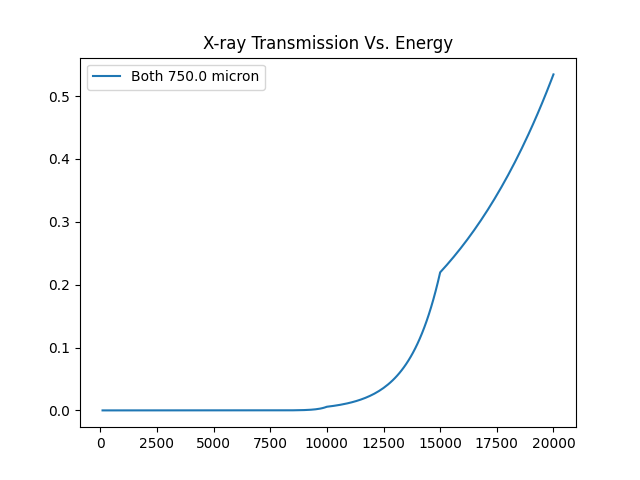

In [13]:
Al_thick = (750)
points = 200
AlTC = np.zeros((points),dtype=np.double)
mylarTC = np.zeros((points),dtype=np.double)
PbTC = np.zeros((points),dtype=np.double)
WavL = np.zeros((points),dtype=np.double)

for val in range(points):
    energy = (val + 1) * 100
    AlTC[val] += MA_Al_Trans(Al_thick,energy)
    mylarTC[val] += MA_Mylar_Trans(Myl_thick,energy)
    WavL[val] += energy
fig,ax =plt.subplots()
TCMylAl = AlTC

# data = ax.plot(WL[:],AlTC[:], label = "Al {:2.1f} micron AL".format(Al_thick))
# data2 = ax.plot(WL[:],mylarTC[:], label = "Mylar {:2.1f} micron Mylar".format(Myl_thick))
data = ax.plot(WavL[:],TCMylAl[:], label = "Both {:2.1f} micron".format(Al_thick))
plt.title("X-ray Transmission Vs. Energy")
plt.legend()
plt.show()